In [1]:
import os
import shutil

base_input_dir = '/kaggle/input/fresh-data/xbd_combined_data'
base_working_dir = '/kaggle/working/xbd_reorganized'

train_input_dir = os.path.join(base_input_dir, 'train')
val_input_dir = os.path.join(base_input_dir, 'val')
test_input_dir = os.path.join(base_input_dir, 'test')

train_working_dir = os.path.join(base_working_dir, 'train')
val_working_dir = os.path.join(base_working_dir, 'val')
test_working_dir = os.path.join(base_working_dir, 'test')


os.makedirs(base_working_dir, exist_ok=True)


if os.path.exists(train_working_dir):
    shutil.rmtree(train_working_dir)
if os.path.exists(val_working_dir):
    shutil.rmtree(val_working_dir)
if os.path.exists(test_working_dir):
    shutil.rmtree(test_working_dir)

shutil.copytree(train_input_dir, train_working_dir)
shutil.copytree(val_input_dir, val_working_dir)
shutil.copytree(test_input_dir, test_working_dir)

print("Data re-copied to /kaggle/working/")

Data re-copied to /kaggle/working/


In [2]:
import os
import shutil

base_working_dir = '/kaggle/working/xbd_reorganized'
train_working_dir = os.path.join(base_working_dir, 'train')
val_working_dir = os.path.join(base_working_dir, 'val')
test_working_dir = os.path.join(base_working_dir, 'test')


os.makedirs(os.path.join(train_working_dir, 'severe-damage'), exist_ok=True)
os.makedirs(os.path.join(val_working_dir, 'severe-damage'), exist_ok=True)
os.makedirs(os.path.join(test_working_dir, 'severe-damage'), exist_ok=True)


destroyed_train_dir = os.path.join(train_working_dir, 'destroyed')
major_damage_train_dir = os.path.join(train_working_dir, 'major-damage')

if os.path.exists(destroyed_train_dir):
    for filename in os.listdir(destroyed_train_dir):
        source = os.path.join(destroyed_train_dir, filename)
        destination = os.path.join(os.path.join(train_working_dir, 'severe-damage'), filename)
        shutil.move(source, destination)
    if os.path.exists(destroyed_train_dir) and not os.listdir(destroyed_train_dir):
        os.rmdir(destroyed_train_dir)

if os.path.exists(major_damage_train_dir):
    for filename in os.listdir(major_damage_train_dir):
        source = os.path.join(major_damage_train_dir, filename)
        destination = os.path.join(os.path.join(train_working_dir, 'severe-damage'), filename)
        shutil.move(source, destination)
    if os.path.exists(major_damage_train_dir) and not os.listdir(major_damage_train_dir):
        os.rmdir(major_damage_train_dir)


destroyed_val_dir = os.path.join(val_working_dir, 'destroyed')
major_damage_val_dir = os.path.join(val_working_dir, 'major-damage')

if os.path.exists(destroyed_val_dir):
    for filename in os.listdir(destroyed_val_dir):
        source = os.path.join(destroyed_val_dir, filename)
        destination = os.path.join(os.path.join(val_working_dir, 'severe-damage'), filename)
        shutil.move(source, destination)
    if os.path.exists(destroyed_val_dir) and not os.listdir(destroyed_val_dir):
        os.rmdir(destroyed_val_dir)

if os.path.exists(major_damage_val_dir):
    for filename in os.listdir(major_damage_val_dir):
        source = os.path.join(major_damage_val_dir, filename)
        destination = os.path.join(os.path.join(val_working_dir, 'severe-damage'), filename)
        shutil.move(source, destination)
    if os.path.exists(major_damage_val_dir) and not os.listdir(major_damage_val_dir):
        os.rmdir(major_damage_val_dir)

destroyed_test_dir = os.path.join(test_working_dir, 'destroyed')
major_damage_test_dir = os.path.join(test_working_dir, 'major-damage')

if os.path.exists(destroyed_test_dir):
    for filename in os.listdir(destroyed_test_dir):
        source = os.path.join(destroyed_test_dir, filename)
        destination = os.path.join(os.path.join(test_working_dir, 'severe-damage'), filename)
        shutil.move(source, destination)
    if os.path.exists(destroyed_test_dir) and not os.listdir(destroyed_test_dir):
        os.rmdir(destroyed_test_dir)

if os.path.exists(major_damage_test_dir):
    for filename in os.listdir(major_damage_test_dir):
        source = os.path.join(major_damage_test_dir, filename)
        destination = os.path.join(os.path.join(test_working_dir, 'severe-damage'), filename)
        shutil.move(source, destination)
    if os.path.exists(major_damage_test_dir) and not os.listdir(major_damage_test_dir):
        os.rmdir(major_damage_test_dir)

print("Data re-organized in /kaggle/working/ complete!")

Data re-organized in /kaggle/working/ complete!


In [3]:
import os

working_base_dir = '/kaggle/working/xbd_reorganized'
train_dir = os.path.join(working_base_dir, 'train')
val_dir = os.path.join(working_base_dir, 'val')
test_dir = os.path.join(working_base_dir, 'test')

print("Contents of training directory:")
print(os.listdir(train_dir))

print("\nContents of validation directory:")
print(os.listdir(val_dir))

print("\nContents of testing directory:")
print(os.listdir(test_dir))

Contents of training directory:
['severe-damage', 'minor-damage', 'no-damage']

Contents of validation directory:
['severe-damage', 'minor-damage', 'no-damage']

Contents of testing directory:
['severe-damage', 'minor-damage', 'no-damage']


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix


base_dir = '/kaggle/working/xbd_reorganized'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

img_height, img_width = 224, 224
batch_size = 32


2025-05-02 14:42:02.924126: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746196923.110702      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746196923.165386      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical',
    shuffle=True, seed=42
)
val_generator = val_test_datagen.flow_from_directory(
    val_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical',
    shuffle=False, seed=42
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical',
    shuffle=False, seed=42
)

class_names = list(train_generator.class_indices.keys())
print("Class Names (3 classes):", class_names)


y_train = train_generator.classes
class_weights_dict = dict(zip(
    train_generator.class_indices.values(),
    class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
))
print("Class Weights (3 classes):", class_weights_dict)


Found 2301 images belonging to 3 classes.
Found 1737 images belonging to 3 classes.
Found 1736 images belonging to 3 classes.
Class Names (3 classes): ['minor-damage', 'no-damage', 'severe-damage']
Class Weights (3 classes): {0: 1.2411003236245954, 1: 0.690990990990991, 2: 1.3385689354275743}


In [7]:

base_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))
base_model.trainable = True
for layer in base_model.layers[:-25]:
    layer.trainable = False


model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])


I0000 00:00:1746196962.382470      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=2e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_loss', patience=20, restore_best_weights=True, verbose=1
)
model_checkpoint = ModelCheckpoint(
    '/kaggle/working/best_model_3class_longer_train.keras',
    monitor='val_accuracy', save_best_only=True, verbose=1
)
callbacks = [early_stopping, model_checkpoint]


In [9]:
epochs = 200
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=callbacks,
    verbose=1,
    class_weight=class_weights_dict
)


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1746197012.013822     117 service.cc:148] XLA service 0x7de8740039a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746197012.014673     117 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1746197013.544373     117 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/72 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.4531 - loss: 1.4237  

I0000 00:00:1746197020.545070     117 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.3723 - loss: 1.2704
Epoch 1: val_accuracy improved from -inf to 0.43408, saving model to /kaggle/working/best_model_3class_longer_train.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 61s 525ms/step - accuracy: 0.3723 - loss: 1.2698 - val_accuracy: 0.4341 - val_loss: 1.0806
Epoch 2/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.4055 - loss: 1.1549
Epoch 2: val_accuracy improved from 0.43408 to 0.49108, saving model to /kaggle/working/best_model_3class_longer_train.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 27s 349ms/step - accuracy: 0.4055 - loss: 1.1543 - val_accuracy: 0.4911 - val_loss: 1.0193
Epoch 3/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.4133 - loss: 1.1119
Epoch 3: val_accuracy improved from 0.49108 to 0.49280, saving model to /kaggle/working/best_model_3class_longer_train.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 27s 344ms/step - accuracy: 0.4136 - loss: 1.1115 - val_accuracy: 0.4928 - val_loss: 1.0102
Epoch 4/200
72/72 ━━━━━━━

55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.5752 - loss: 0.9907
Test Loss: 0.9077, Test Accuracy: 0.6158
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step
Classification Report:
               precision    recall  f1-score   support

 minor-damage       0.46      0.52      0.49       425
    no-damage       0.78      0.65      0.71       800
severe-damage       0.56      0.65      0.60       511

     accuracy                           0.62      1736
    macro avg       0.60      0.60      0.60      1736
 weighted avg       0.64      0.62      0.62      1736



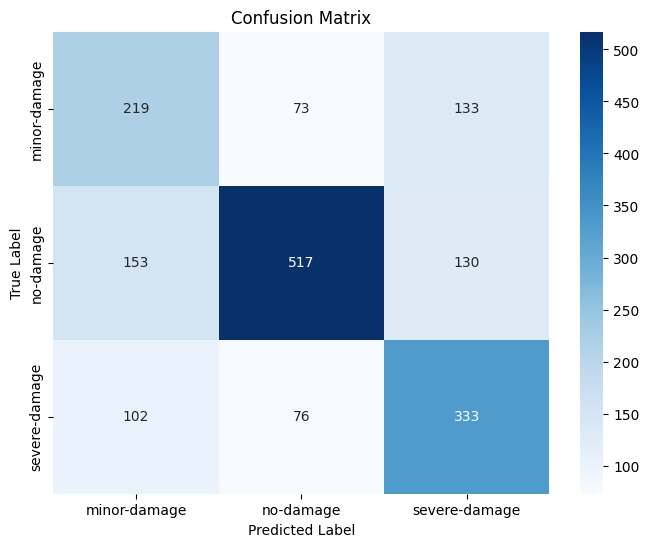

In [10]:

model = models.load_model('/kaggle/working/best_model_3class_longer_train.keras')

test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


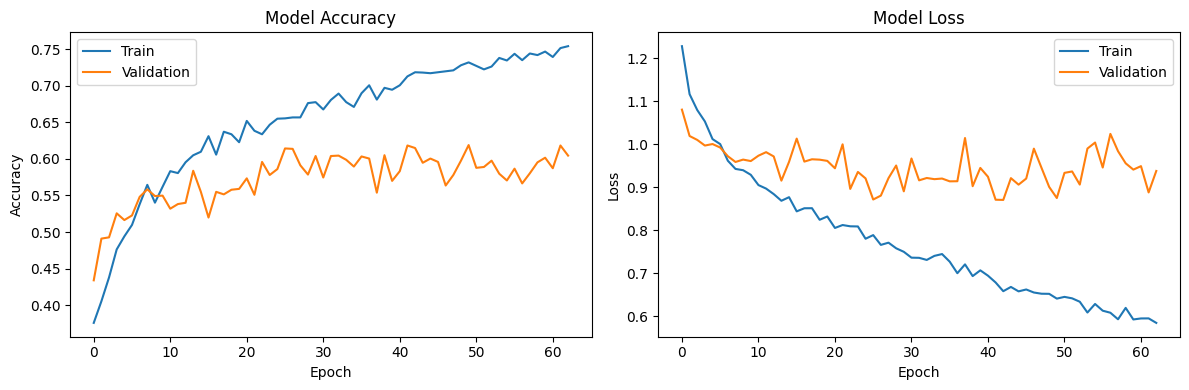

In [11]:
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
